<a href="https://colab.research.google.com/github/anyuanay/INFO213/blob/main/INFO213_Week1_2_TrainingSimpleClassifier_answers_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 213: Data Science Programming 2
___

### Week 1-2: Training Simple Artificial Neurons for Classification
___


**Aganda:**
- Implement a perceptron step by step in Python
- Develop the concept of machine learning algorithms for classification
- Develop the basics of optimization using adaptive linear neurons
- Investigate the impact of learning rate to gradient descent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Training data contains two parts: feature matrix $\mathbf{X}$ and target vector $y$.


# Artificial Neurons
- Multiple signals arrive at the dendrites
- Signals are integrated into the cell body
- If the accumulated signal exceedsa certain threshold, an output signal is generated that will be passed onby the axon.
<img src="https://i.imgur.com/JR3ZHFS.png" width=800>

# The formal definition of an artificial neuron

## Classify by a linear combination and a threshold
- In context of binary classification problem.
- Two classes: 0 and 1
- Input
\begin{align} \mathbf{x}=\begin{bmatrix}
x_1\\
x_2 \\
...\\
x_m
\end{bmatrix}
\end{align}
- Weights
\begin{align} \mathbf{w}=\begin{bmatrix}
w_1\\
w_2 \\
...\\
w_m
\end{bmatrix}
\end{align}
- The output is a linear combination of the input by the weights: $z=w_1x_1 + w_2x_2 + ... + w_m x_m = \mathbf{w}^T \mathbf{x}$ (**if necessary, review linear algebra on product.**)
- Given a threshold $\theta$, define a decision function $\phi(z)$ as:
\begin{equation}
    \phi(z)=
\begin{cases}
    1,& \text{if } z\geq \theta\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}

## Linear combination with a bias
- For simplicity, we can bring the threshold, $\theta$, to the left side of the equation and define a weight-zero as $b = -\theta$, then we have the equation:
$z=w_1x_1 + w_2x_2 + ... + w_m x_m + b = \mathbf{w}^T \mathbf{x} + b$
- The decision function $\phi(z)$ is:
\begin{equation}
    \phi(z)=
\begin{cases}
    1,& \text{if } z\geq 0\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}
- In machine learning literature, $b$ is called **bias**.

## Visualization
The following figure illustrates how the net input
is squashed into a binary output (0 or 1) by the decision
function of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes
(right subfigure):
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_02.png?raw=true" width=800>

## The perceptron learning rule
The perceptron algorithm can be summarized by the following steps:
1. Initialize the weights and bias to 0 or small random numbers.
2. For each training example $\mathbf{x}^{(i)}$,
 1. Compute the output value $\bar{y}^{(i)}$,
 2. Update the weights $\mathbf{w} = \{w_j, j=1..m\}$ as follows: $w_j := w_j + \Delta w_j$, where, $\Delta w_j=\eta(y^{(i)}-\bar{y}^{(i)})x_j^{(i)}$.
 3. Update the bias $b = b + \Delta b$, where $\Delta b = \eta(y^{(i)}-\bar {y}^{(i)})$.
 4. $\eta$ is a learning rate

## Visualization
The perceptron learning rule can be summarized in a simple diagram:
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_04.png?raw=true" width=800>

## Manual exercise on single variable input
- Input: $\mathbf{x}^1 = 0.5$ and $\mathbf{x}^2 = 2$
- True labels: $y^1 = 0$ and $y^2 = 1$.
- Initial weight and bias: $w_1 = -1$, $b=1$.
- $ z = (-1 \times 0.5) + 1 = 0.5 > 0$, so $\bar{y}^1 = \phi(z) = 1$
- Set the learning rate $\eta=1$
- update the weight $w_1$: $\Delta w_1 = \eta(y^1 - \bar{y}^1) x_1 =1(0-1)0.5=-0.5$, $w_1 := w_1 + \Delta w_1 = -1 + (-0.5) = -1.5$
- update the bias $b$ : $\Delta b = \eta(y^1 - \bar{y}^1)= 1(0-1) = -1$, $b := b + \Delta b = 1 + (-1) = 0$
- The new weight $w_1 = -1.5$ and new bias $b=0$.
- Continue to update on $\mathbf{x}^2$


# Retrieval practice

## Plot the Data and Models

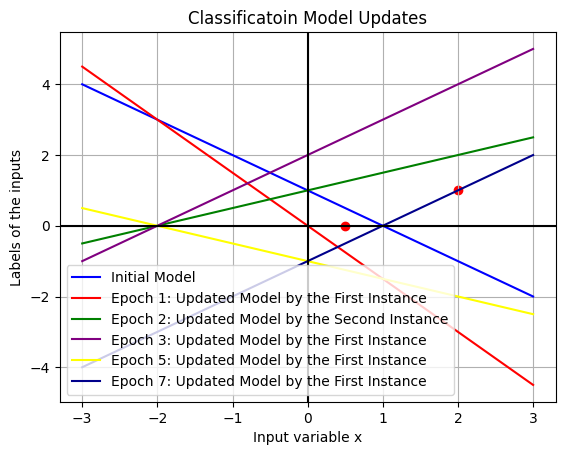

In [ ]:
# plot line y = w0 + w1*x
def plot_line(w0, w1, color='r', legend='y = w0 + w1*x'):
  """
  Plots a line defined by y = w0 + w1*x.

  Args:
    w0: The y-intercept of the line.
    w1: The slope of the line.
    color: The color of the line (default: 'r' for red).
    legend: The legend string for the line (default: 'y = w0 + w1*x').
  """
  x = np.linspace(-3, 3, 10)  # Create some points
  y = w0 + w1 * x
  plt.plot(x, y, color=color, label=legend)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid(True)

def plot_point(x, y):
  plt.scatter(x, y, color='red')

def plot_axis():
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')

plot_point(0.5, 0)
plot_point(2, 1)

# 1-x
plot_line(1, -1, 'blue', 'Initial Model')
# -1.5x
plot_line(0, -1.5, 'red', 'Epoch 1: Updated Model by the First Instance')
# 1+0.5x
plot_line(1, 0.5, 'green', 'Epoch 2: Updated Model by the Second Instance')
# 1+2x
plot_line(2, 1, 'purple', 'Epoch 3: Updated Model by the First Instance')
# -1-0.5x
plot_line(-1, -0.5, 'yellow', 'Epoch 5: Updated Model by the First Instance')
# -1+x
plot_line(-1, 1, 'darkblue', 'Epoch 7: Updated Model by the First Instance')

plot_axis()

plt.legend()

plt.xlabel("Input variable x")
plt.ylabel("Labels of the inputs")

plt.title("Classificatoin Model Updates")

plt.show()


## Implement the Perceptron Learning Algorithm
We take an object-oriented approach to defining the perceptron in-terface as a Python class, which will allow us to initialize new Perceptron objects that can learn from data via a `fit` method, andmake predictions via a separate `predict` method.

```
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_: 1d-array
      bias after fitting
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state


    def predict(self, X):
        """Return class label after unit step"""

        # compute the z values

        z = np.dot(X, self.w_) + self.b_

        return np.where(z >= 0.0, 1, 0)

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update

                errors += int(update != 0.0)

            self.errors_.append(errors)

        return self
```

In [ ]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_: 1d-array
      bias after fitting
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        # initialize class variables



    def predict(self, X):
        """Return class label after unit step"""

        # compute the z values




    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        # intialize weights and bias


        for _ in np.arange(self.epochs):



        return self


## Train a perceptron model on the Iris dataset
- We will restrict to two features, sepal length and petal length.
- We only consider two flower classes, Setosa and Versicolor, from the Iris dataset for practical reasons. That is, we only consider the first 100 examples.

In [ ]:
# Load the Iris data into a dataframe
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3.0,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5.0,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5.0,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3.0,1.4,0.1,setosa\n4.3,3.0,1.1,0.1,setosa\n5.8,4.0,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1.0,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5.0,3.0,1.6,0.2,setosa\n5.0,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.0,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3.0,1.3,0.

```
df = pd.read_csv('iris.csv')
df.head()
```

```
df.species.unique()
```

### Plot the iris data

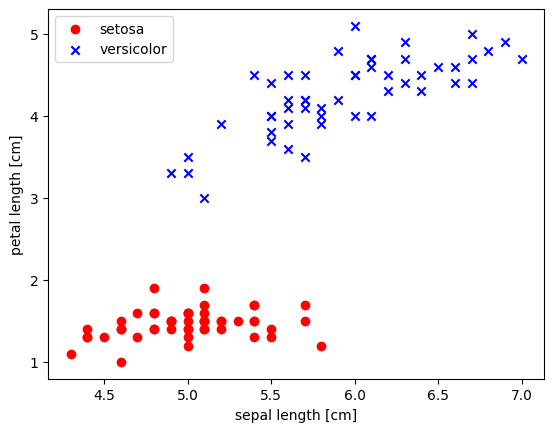

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Train the perceptron

```
# extract sepal length and petal length as the training data
X = df.iloc[0:100, [0, 2]].values
X.shape
```

```
# extract the target label
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', 0, 1)
y.shape
```

```
ppn = Perceptron(eta=0.1, epochs=10)

ppn.fit(X, y)
```

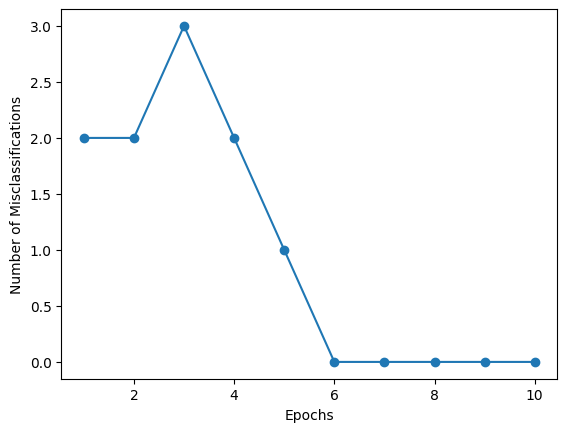

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### Plot the decision bounary and regions

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

```
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()
```

# Retrieval practice

## Adaptive linear neurons and the convergence of learning
- To better understand logistic regression, support vector machine, and regression, we will take a look at another type of single-layer neural network (NN): ADAptive LInear NEuron ( Adaline).
- The key difference the Adaline and perceptron rule
is that the weights are updated based on a linear activation function rather than a unit step function.
- In Adaline, $\phi(z)=\phi(\mathbf{w}^T \mathbf(x)) = \mathbf{w}^T \mathbf(x)$.
- The Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.



## Adaline Cost Function
- The cost function $J$ of Adaline learning is defined as the
sum of squared errors (SSE) between the calculated
outcome and the true class label:
\begin{equation}
J(\mathbf{w}) = \frac{1}{2}\Sigma_i(y^{(i)}-\phi(z^{(i)}))^2
\end{equation}
- Question: why there is a factor $\frac{1}{2}$ in the cost function?
- The cost function is differentiable.
- The cost function is convex.
- A very simple yet powerful optimization algorithm called
gradient descent can be used to find the weights that minimize our cost function.

<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_09.png?raw=true" width=800>

## Gradient descent
- As climbing down a hill until a local or global cost minimum is reached.
- In each iteration, we take a step in the opposite direction of the gradient
- The step size is determined by the value ofthe learning rate, as well as the slope of the gradient.
<img src="https://i.imgur.com/2nqogyT.png" width=800>

## Update the weights by gradient descent
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$
, of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$.
- To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight, $w_j$:
\begin{equation}
\frac{\partial J}{\partial w_j} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}
- Let us derive the above partial derivative (exercise)
- Each $w_j$ is updated:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}

## Similary, update the bias by gradient descent
- Update the bias by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$
, of our cost function $J(\mathbf{w})$:
 - $\mathbf{b} := \mathbf{b} + \Delta \mathbf{b}$, where $\Delta \mathbf{b}= - \eta \nabla J(\mathbf{w})$.
- We need to compute the partial derivative of the cost function with respect to the bias, $b$:
\begin{equation}
\frac{\partial J}{\partial b} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))
\end{equation}
- Let us derive the above partial derivative (exercise)
- The bias $b$ is updated:
\begin{equation}
\Delta b = - \eta \frac{\partial J}{\partial b} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))
\end{equation}


## Manual exercise on single variable input
- Input: $\mathbf{x}^1 = 0.5$ and $\mathbf{x}^2 = 2$
- Set the learning rate $\eta=1$
- True labels: $y^1 = 0$ and $y^2 = 1$.
- Initial weight: $w_1 = -1$ and initial bias $b=1$
- In the first epoch:
 - $ z^1 = 1 + (-1 \times 0.5) = 0.5$, so $\bar{y}^1 = \phi(z) = 0.5$
 - $ z^2 = 1 + (-1 \times 2) = -1$, so $\bar{y}^2 = \phi(z) = -1$
 - errors = $y^i - \bar{y}^i = [0-0.5, 1-(-1)] = [-0.5, 2]$
 - update the bias $b$ : $\Delta b = \eta \Sigma(errors)=\eta \Sigma_i(y^i - \bar{y}^i)= 1(-0.5 + 2) = 1.5$, $b := b + \Delta b = 1 + 1.5 = 2.5$
 - update the weight $w_1$: $\Delta w_1 = \eta \Sigma_i (y^i - \bar{y}^i) x_i =1[(-0.5\times0.5)+(2\times 2)]=3.75$, $w_1 := w_1 + \Delta w_1 = -1 + 3.75 = 2.75$
 - The new weight, $w_1 = 2.75$ and the new bias $b=2.5$.
 - The cost is $\frac{1}{2}\Sigma_i errors^2=\frac{1}{2}((-0.5)^2 + 2^2)=2.125$
 - Continue to update the weights in next epoch.

- In the second epoch:
 - $ z^1 = 2.5 + (2.75 \times 0.5) = 3.875$, so $\bar{y}^1 = \phi(z) = 3.875$
 - $ z^2 = 2.5 + (2.75 \times 2) = 8$, so $\bar{y}^2 = \phi(z) = 8$
 - errors = $y^i - \bar{y}^i = [0-3.875, 1-6] = [-3.875, -5]$
 - update the bias $b$ : $\Delta b = \eta \Sigma(errors)=\eta \Sigma_i(y^i - \bar{y}^i)= 1(-3.875 - 5) = -8.875$, $b := b + \Delta b = 2.5 + (-8.875) = -6.375$
 - update the weight $w_1$: $\Delta w_1 = \eta \Sigma_i (y^i - \bar{y}^i) x_i =1[(-3.875\times0.5)+(-5\times 2)]=-11.9375$, $w_1 := w_1 + \Delta w_1 = 2.75 + (-11.9375) = -9.1875$
 - The new weight $w_1 = -9.1875$ and new bias $b=-6.375$.
 - The cost is $\frac{1}{2}\Sigma_i errors^2=\frac{1}{2}((-3.875)^2 + (-5)^2)=20.01$
 - Continue to update the weights in next epochs.$


# Retrieval practice

## Plot the Data and Models

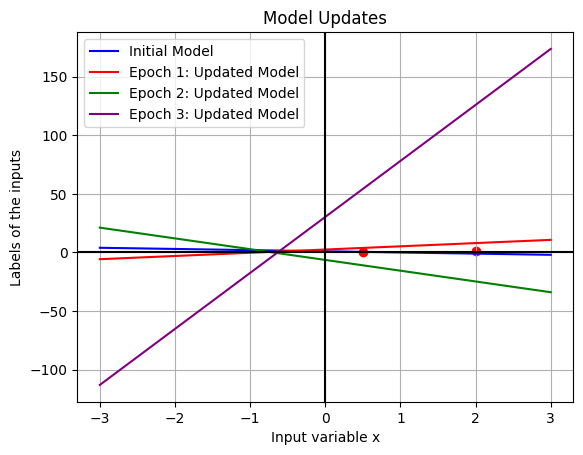

In [ ]:
# plot line y = w0 + w1*x
def plot_line(w0, w1, color='r', legend='y = w0 + w1*x'):
  """
  Plots a line defined by y = w0 + w1*x.

  Args:
    w0: The y-intercept of the line.
    w1: The slope of the line.
    color: The color of the line (default: 'r' for red).
    legend: The legend string for the line (default: 'y = w0 + w1*x').
  """
  x = np.linspace(-3, 3, 10)  # Create some points
  y = w0 + w1 * x
  plt.plot(x, y, color=color, label=legend)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid(True)

def plot_point(x, y):
  plt.scatter(x, y, color='red')

def plot_axis():
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')

plot_point(0.5, 0)
plot_point(2, 1)

# 1-x
plot_line(1, -1, 'blue', 'Initial Model')
# 2.5+2.75x
plot_line(2.5, 2.75, 'red', 'Epoch 1: Updated Model')
# -6.375-9.1875x
plot_line(-6.375, -9.1875, 'green', 'Epoch 2: Updated Model')
# 30.33+47.79x
plot_line(30.33, 47.79, 'purple', 'Epoch 3: Updated Model')


plot_axis()

plt.legend()

plt.xlabel("Input variable x")
plt.ylabel("Labels of the inputs")

plt.title("Model Updates")

plt.show()


## Implement the Adaline learning algorithm

```
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : 1d-array
      bias after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def activation(self, z):
        """Compute linear activation"""
        return z

    def predict(self, X):
        """Return class label after unit step"""

        # compute the z values;
        z = np.dot(X, self.w_) + self.b_

        return np.where(self.activation(z) >= 0.0, 1, 0)

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)

        self.cost_ = []

        for i in range(self.epochs):
            # compute the z values
            z = np.dot(X, self.w_) + self.b_

            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = z` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(z)
            errors = (y - output)

            self.w_ += self.eta * X.T.dot(errors)
            self.b_ += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self
```

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : 1d-array
      bias after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        # initialize variables



    def activation(self, z):
        """Compute linear activation"""




    def predict(self, X):
        """Return class label after unit step"""

        # compute the z values;




    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        # intialization


        self.cost_ = []

        for i in range(self.epochs):
            # compute the z values


            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = z` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.



        return self

## Classify the Iris data by Adaline

In [ ]:
# Load the Iris data into a dataframe
from google.colab import files
files.upload()

Saving iris.csv to iris (1).csv


{'iris (1).csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3.0,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5.0,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5.0,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3.0,1.4,0.1,setosa\n4.3,3.0,1.1,0.1,setosa\n5.8,4.0,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1.0,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5.0,3.0,1.6,0.2,setosa\n5.0,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.0,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3.0,1.

### Plot the iris data

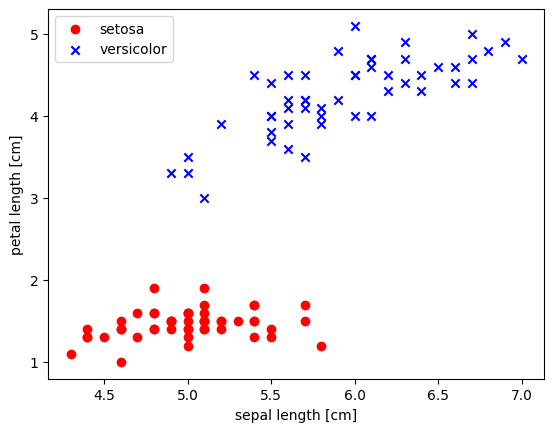

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Train the Adaline Model on Iris setosa and versicolor

```
# extract sepal length and petal length as the training data

X = df.iloc[0:100, [0, 2]].values
X.shape
```

```
# extract the target label
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)
y.shape
```

```
adaline = AdalineGD(epochs=10, eta=1)

adaline.fit(X, y)
```

### Plot the decision bounary of the Adaline model

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-65-4545546797a8>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


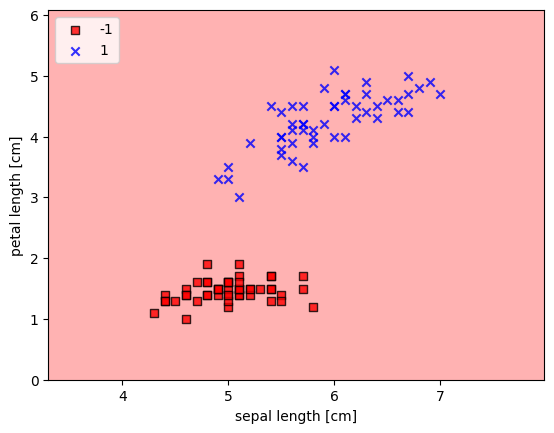

In [ ]:
plot_decision_regions(X, y, classifier=adaline)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Plot the losses of the Adaline Model

```
plt.plot(range(1, len(adaline.cost_) + 1), np.log10(adaline.cost_), marker='o')
```

# Retrieval practice

## Hyperparameter tuning
- In practice, it often requires some experimentation to find a good learn-ing rate, $\eta$, for optimal convergence.
- Let's choose two different learn-ing rates, 0.01, and, 0.001, to start with and plot the cost functions versus the number of epochs.

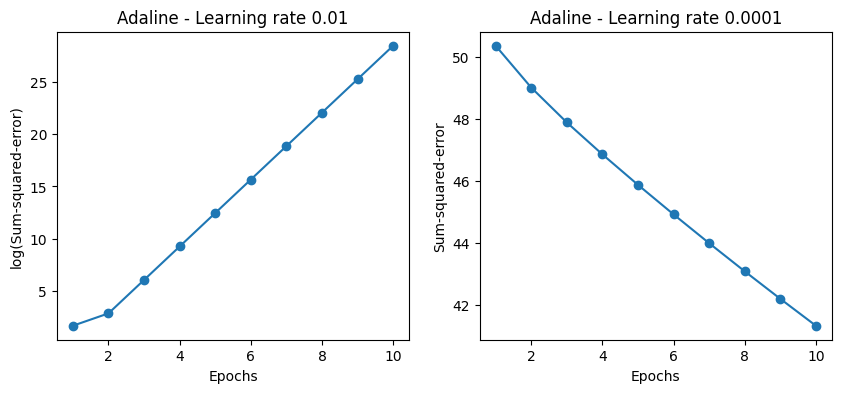

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(epochs=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(epochs=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Visualization
- The left subfigure illustrates the case of a well-chosen learning rate
- The subfigure on the right, however, illustrates what happens if we choose a learning rate that is too large — we overshoot the global minimum:
<img src="https://i.imgur.com/nqZnv7s.png" width=800>

## Improving gradient descent through feature scaling
- Gradient descent is one of the many algorithms that benefit from feature scaling.
- Normalization procedure helps gradient descent learning to converge more quickly.
- Normalization does not make the original dataset normally distributed.
- It shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance).
- To standardize the $j$th feature, we can simply subtract the sample mean, $\mu_j$,from every training example and divide it by its standard deviation, $\sigma_j$:
\begin{equation}
x_j' = \frac{x_j - \mu_j}{\sigma_j}
\end{equation}

## Visualization
- One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution (the global cost minimum):
<img src="https://i.imgur.com/UkrW657.png" width=800>

```
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
```

<ipython-input-65-4545546797a8>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


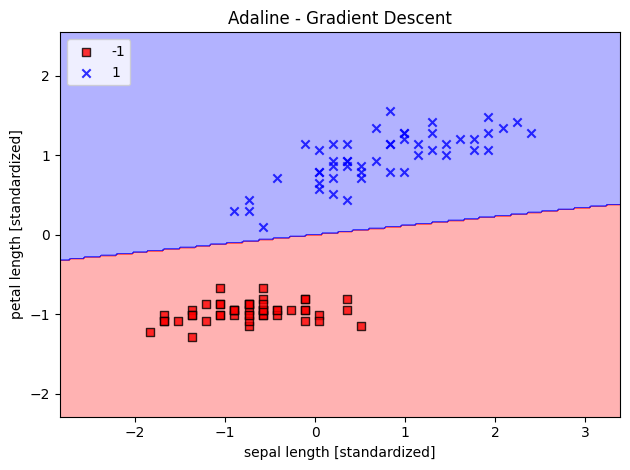

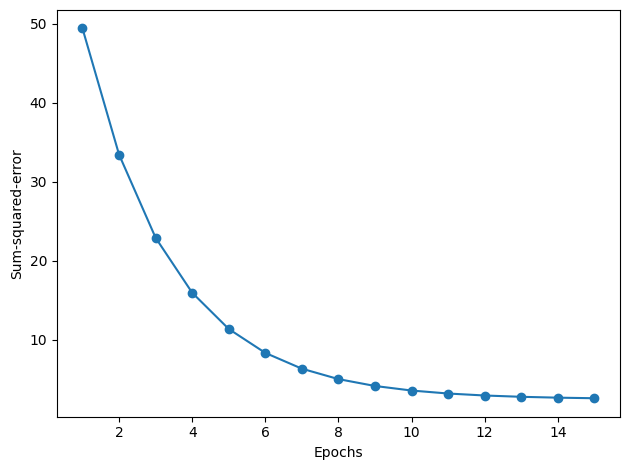

In [ ]:
ada_gd = AdalineGD(epochs=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# Retrieval practice

## Large-scale machine learning and stochastic gradient descent
- Batch gradient descent: a cost gradient that is calculated
from the whole training dataset.
- Batch gradient descent can be computationally quite costly for a very large dataset with millions of data points.
- Stochastic gradient descent: update
the weights incrementally for each training example:
\begin{equation}
    \Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta (y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}
- In SGD implementations, the fixed learning rate, $\eta$, is oftenreplaced by an adaptive learning rate that decreases overtime, for example:
\begin{equation}
\eta = \frac{c_1}{number\_of\_epochs + c_2}
\end{equation}
- A compromise between batch gradient descent and SGD is
so-called mini-batch learning.
- Mini-batch learning can be understood as applying batch gradient descent to smaller subsets of the training data.

```
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : 1d-array
      Bias after fitting
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, epochs=10, shuffle=True, random_state=None):
        self.eta = eta
        self.epochs = epochs
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)

        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = m)
        self.b_ = np.float_(0.)

        self.w_initialized = True

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))

        return X[r], y[r]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""

        # Calculate net input
        z = np.dot(xi, self.w_) + self.b_

        output = self.activation(z)

        error = (target - output)

        self.w_ += self.eta * xi.dot(error)
        self.b_ += self.eta * error

        cost = 0.5 * error**2

        return cost

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):

            if self.shuffle:
                X, y = self._shuffle(X, y)

            cost = []

            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))

            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)

        return self


    def predict(self, X):
        """Return class label after unit step"""

        # Calculate net input
        z = np.dot(X, self.w_) + self.b_

        return np.where(self.activation(z) >= 0.0, 1, -1)
```

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : 1d-array
      Bias after fitting
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, epochs=10, shuffle=True, random_state=None):
        # initialization



    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""




    def _shuffle(self, X, y):
        """Shuffle training data"""




    def activation(self, X):
        """Compute linear activation"""




    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""

        # Calculate net input





        return cost

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        # initialization



        for i in range(self.epochs):

           # implementation


        return self


    def predict(self, X):
        """Return class label after unit step"""

        # Calculate net input


        return np.where(self.activation(z) >= 0.0, 1, -1)

<ipython-input-73-4545546797a8>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


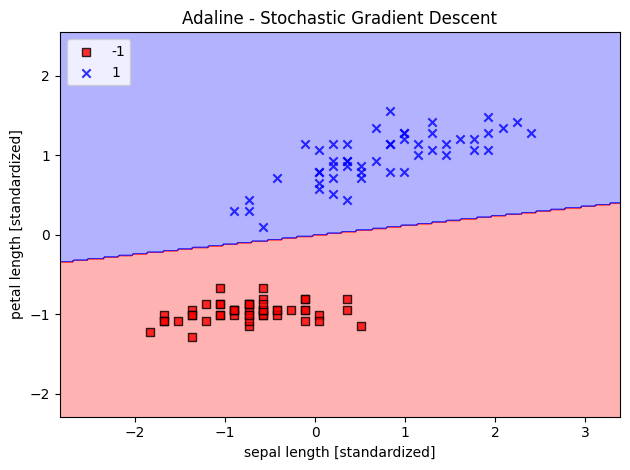

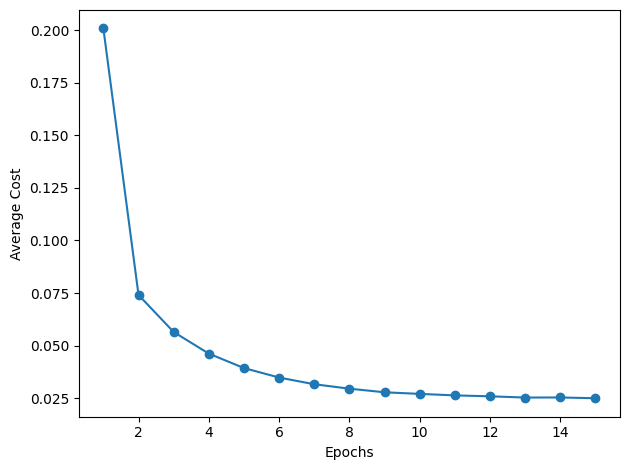

In [ ]:
ada_sgd = AdalineSGD(epochs=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

## Use Scikit-Learn Perceptron Class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generateXy():
    """
    Generate 25 random values that are in [-1, 0.5] with label -1 and
    25 random values that are in [1.5, 3] with label 1.
    The values are used for training a single variable perceptron.
    Input: None
    Output: (X, y): 25 values in [-1, 0.5] with label -1
                    and 25 values in [1.5, 3] with label 1
    """

    # Generate 25 random points that x < 0.5 and y = -1
    np.random.RandomState(1234)

    x1 = np.random.uniform(-1, 0.5, size=25)
    y1 = np.ones(len(x1)) * -1

    # Generate 25 random points that x > 1.5 and y = 1
    x2 = np.random.uniform(1.5, 3, size=25)
    y2 = np.ones(len(x2))

    x12 = np.concatenate((x1, x2))
    y12 = np.concatenate((y1, y2))

    Xy = list(zip(x12, y12))
    random.shuffle(Xy)

    return Xy

In [ ]:
from sklearn.linear_model import Perceptron

```
Xy = generateXy()
X, y = zip(*Xy)
```

```
X_arr = np.array(X).reshape(-1, 1)
```

```
y_arr = np.array(y)
```

```
sk_pnn = Perceptron(eta0=0.1, random_state=123)

sk_pnn.fit(X_arr, y_arr)
```

```
sk_pnn.intercept_, sk_pnn.coef_
```

```
etas = np.arange(0.1, 1, 0.1)
weights_list = []
for eta in etas:
    sk_pnn = Perceptron(eta0=eta, random_state=123)
    sk_pnn.fit(X_arr, y_arr)
    weights_list.append((sk_pnn.intercept_[0], sk_pnn.coef_[0][0]))
```

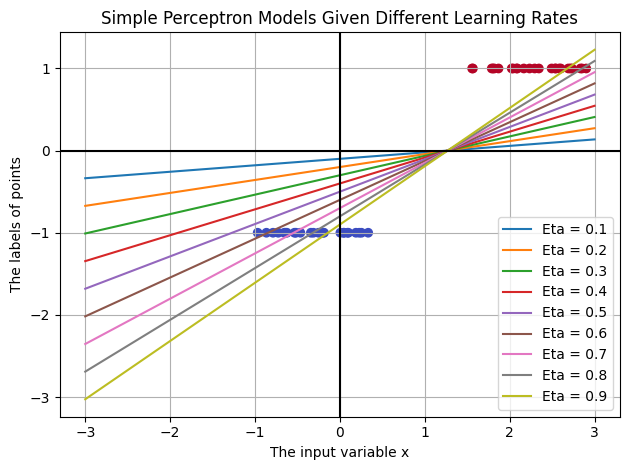

In [ ]:
# plot the points and the models based on different eta

# Plot the points
plt.scatter(X, y, c=y, cmap="coolwarm")

# plot line y = w0 + w1*x
def plot_line(w0, w1, legend='y = w0 + w1*x'):
  """
  Plots a line defined by y = w0 + w1*x.

  Args:
    w0: The y-intercept of the line.
    w1: The slope of the line.
    color: The color of the line (default: 'r' for red).
    legend: The legend string for the line (default: 'y = w0 + w1*x').
  """
  x = np.linspace(-3, 3, 10)  # Create 10 points
  y = w0 + w1 * x
  plt.plot(x, y, label=legend)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid(True)

# Plot the line y = weights[0] + weights[1] * x
etas = np.arange(0.1, 1.1, 0.1)
for idx, weights in enumerate(weights_list):
    label = "Eta = {:0.1f}".format(etas[idx])
    plot_line(weights[0], weights[1], label)

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xlabel("The input variable x")
plt.ylabel("The labels of points")
plt.title("Simple Perceptron Models Given Different Learning Rates")

plt.legend()
plt.tight_layout()

plt.show()

# Retrieval practice